<div style="align: center;">
    <br>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/2289007/3846912/ad5e128929f5ac26133b67a6110de7c0/dataset-cover.jpg?" style="display:block; margin:auto; width:75%; height:350px;">
</div><br><br> 

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Finance Company Credit-Related Information</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.0; font-size:28px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Module: Part 2: Credit Score Multi-Class Classification<br>Models: Logistic Regression, Random Forest, XGBoost</p>    
</div>

**About Dataset**

**Problem Statement**

You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**

Given a person’s credit-related information, build a machine learning model that can classify the credit score.

<h4>Table of Contents</h4>


01. Import Libraries
02. Reading Clean the Data from File
03. Multi-class Classification Data Pre-Processing
    01. Implement Logistic Regression Model
    02. Implement Random Forest Classifier Model
    03. Implement Xgboost Classifier Model
04. Future Importance XGBoost 
05. Final Model


## For Detailed EDA: [credit-score-classification-data-cleaning-project](https://www.kaggle.com/code/clkmuhammed/credit-score-classification-data-cleaning-project)

## Clean Dataset: [Credit score classification](https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification)
## Dataset      : [Credit score classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

# 01. Import Libraries 

In [46]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.3f}')

# import warnings
# # Suppressing a warning 
# warnings.filterwarnings("ignore") 
# warnings.warn("this will not show")

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()

710

# 02. Reading Clean the Data from File

In [47]:
# we are using cleaned Data
df_origin_train = pd.read_csv('/kaggle/input/creditscoreclassification/train.csv')
df_train = df_origin_train.copy()

df_origin_test = pd.read_csv('/kaggle/input/creditscoreclassification/test.csv')
df_test = df_origin_test.copy()

df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [52]:
df_train.head(8).T

,0,1,2,3,4,5,6,7
ID,5634,5635,5636,5637,5638,5639,5640,5641
Customer_ID,3392,3392,3392,3392,3392,3392,3392,3392
Month,1,2,3,4,5,6,7,8
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23.000,23.000,23.000,23.000,23.000,23.000,23.000,23.000
SSN,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000,821000265.000
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120,19114.120
Monthly_Inhand_Salary,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843,1824.843
Num_Bank_Accounts,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

In [55]:
# Drop the Columns we not use in model
df_train.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN'], inplace=True)

In [56]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.000,33.316,10.765,14.000,24.000,33.000,42.000,56.000
Annual_Income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,100000.000,4197.271,3186.432,303.645,1626.594,3095.905,5957.715,15204.633
Num_Bank_Accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
Interest_Rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,100000.000,21.081,14.805,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,100000.000,13.313,6.237,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,100000.000,10.470,6.609,0.500,5.380,9.400,14.850,29.980


In [57]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.000,33.804,10.765,14.000,25.000,33.000,42.000,56.000
Annual_Income,50000.000,50505.123,38299.614,7005.930,19342.972,36999.705,71683.470,179987.280
Monthly_Inhand_Salary,50000.000,4183.034,3175.319,303.645,1623.555,3082.272,5937.530,15204.633
Num_Bank_Accounts,50000.000,5.369,2.595,0.000,3.000,5.000,7.000,11.000
Num_Credit_Card,50000.000,5.534,2.072,0.000,4.000,5.000,7.000,11.000
Interest_Rate,50000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
Num_of_Loan,50000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
Delay_from_due_date,50000.000,21.067,14.806,0.000,10.000,18.000,28.000,62.000
Num_of_Delayed_Payment,50000.000,13.315,6.238,0.000,9.000,14.000,18.000,25.000
Changed_Credit_Limit,50000.000,10.465,6.606,0.500,5.380,9.410,14.810,29.980


In [58]:
df_train.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28580
Credit_Score,100000,3,Standard,53174


In [59]:
df_test.select_dtypes(include="object").describe().T

,count,unique,top,freq
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,14151


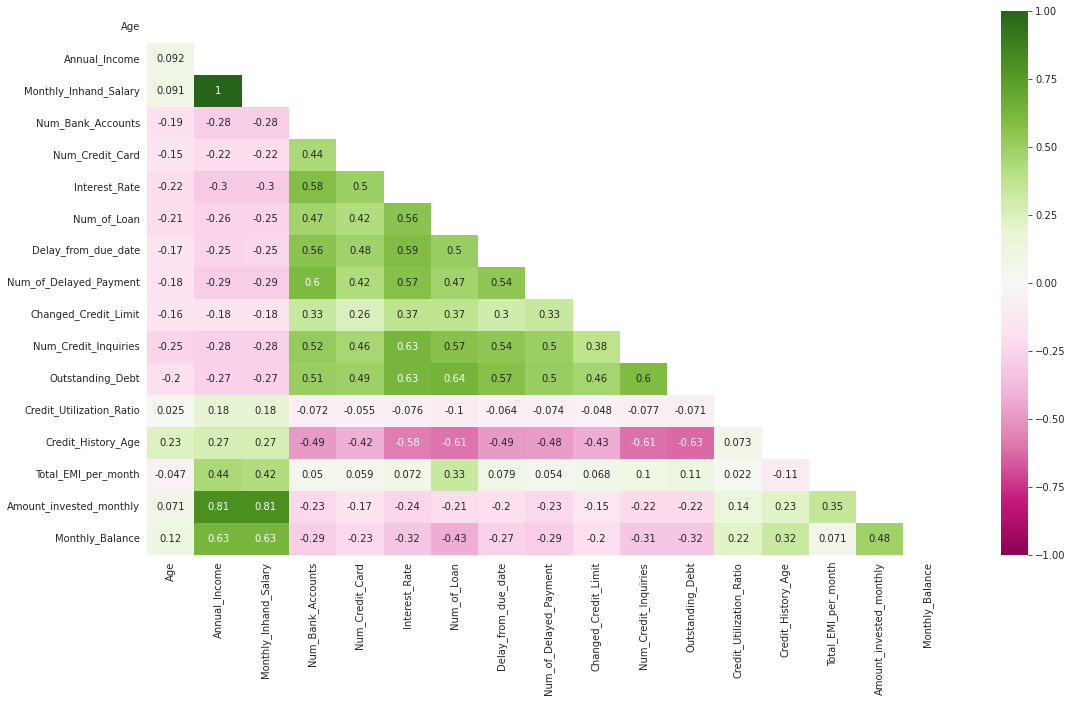

In [60]:
# Correlation between Numerical features
plt.figure(figsize=(18, 10))
sns.heatmap(
    df_train.corr(), 
    mask=np.triu(np.ones_like(df_train.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1, cmap="PiYG"
);

# 03. Multi-class Classification Data Pre-Processing

## Import Libraries

In [61]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# conda install -c conda-forge xgboost
from xgboost import XGBClassifier

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# import pickle

random_state = 42

## Train | Test Split

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [63]:
df_train["Credit_Score"].value_counts(normalize=True).sort_index()

Good       0.178
Poor       0.290
Standard   0.532
Name: Credit_Score, dtype: float64

In [64]:
X      = df_train.drop(columns="Credit_Score")
y      = df_train['Credit_Score']
X_test = df_test

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, 

((80000, 22), (80000,), (20000, 22), (20000,), (50000, 22))

## Label Encoder

In [65]:
from sklearn.preprocessing import LabelEncoder

le      = LabelEncoder()
print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_val   = le.transform(y_val)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


0    14301
1    23124
2    42575
dtype: int64

In [66]:
# our focus group
le.inverse_transform([1])

array(['Poor'], dtype=object)

## Dummy Operation

https://celik-muhammed.medium.com/how-to-converting-pandas-column-of-comma-separated-strings-into-dummy-variables-762c02282a6c

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin): 
    def __init__(self, data_sep=',', col_name_sep='_'):
        """
        Transformer that creates dummy variables from categorical columns with a separator.
        Parameters:
            - data_sep (str): Separator used to split categorical values into multiple dummy variables.
            - col_name_sep (str): Separator used to separate the column name from the prefix in the output column names.
        """
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep
        
    # Return self nothing else to do here
    def fit(self, X, y  = None): 
        """
        Fit the transformer to the data.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - self: Returns the transformer object.
        """
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2]   for col in self.dummy_cols]
        
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))            
            
        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self
    
    # Transformer method we wrote for this transformer
    def transform(self, X, y = None):
        """
        Transform the input data by creating dummy variables.
        Parameters:
            - X (pandas.DataFrame): Input data with categorical columns.
            - y (array-like): Target variable (ignored).
        Returns:
            - X_transformed (pandas.DataFrame): Transformed data with dummy variables.
        """
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))   

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)          
        return X_transformed
        
    # to get feature names    
    def get_feature_names_out(self, input_features=None):
        """
        Get the names of the transformed features.
        Parameters:
            - input_features (array-like): Names of the input features (ignored).
        Returns:
            - output_features (list): Names of the transformed features.
        """
        return self.columns.tolist()

In [68]:
# check for columns containing commas
[col for col in X_train.select_dtypes('O').columns if X_train[col].str.contains(',', regex=True).any()]

['Type_of_Loan']

In [69]:
dummy = GetDummies()

X_train_dummy = dummy.fit_transform(X_train)
X_val_dummy   = dummy.transform(X_val)

X_train_dummy.shape, X_val_dummy.shape

((80000, 31), (20000, 31))

In [70]:
X_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 75220 to 15795
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          80000 non-null  float64
 1   Occupation                   80000 non-null  object 
 2   Annual_Income                80000 non-null  float64
 3   Monthly_Inhand_Salary        80000 non-null  float64
 4   Num_Bank_Accounts            80000 non-null  float64
 5   Num_Credit_Card              80000 non-null  float64
 6   Interest_Rate                80000 non-null  float64
 7   Num_of_Loan                  80000 non-null  float64
 8   Delay_from_due_date          80000 non-null  float64
 9   Num_of_Delayed_Payment       80000 non-null  float64
 10  Changed_Credit_Limit         80000 non-null  float64
 11  Num_Credit_Inquiries         80000 non-null  float64
 12  Credit_Mix                   80000 non-null  object 
 13  Outstanding_

## OneHotEncoder and LabelEncoder

- Nominal data represents categories without any inherent order or hierarchy. Each category is independent of others. One-hot encoding is commonly used for nominal data.

In [71]:
from sklearn.preprocessing import OneHotEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.tolist()   
print('OneHotEncoder:', cat)
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(
    ohe.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_val_cat  = pd.DataFrame(
    ohe.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = ohe.get_feature_names_out(cat)
)    
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_ohe   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_ohe.shape, X_val_ohe.shape

OneHotEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 54), (20000, 54))

In [24]:
X_train_ohe.columns

Index(['Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Age',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Nu

## Scale data

In [25]:
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_ohe), columns=X_train_ohe.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val_ohe), columns=X_val_ohe.columns)

## Define Model Evaluation Functions

In [26]:
from sklearn.metrics import confusion_matrix, classification_report 

def eval(model, X_train, X_val, y_train=y_train, y_val=y_val):
    print('TEST')
    y_val_pred = model.predict(X_val)
    print(confusion_matrix(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    print("-------------------------------------------------------")
    print('TRAIN')
    y_train_pred = model.predict(X_train)
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import make_scorer

# for multi-class
scoring = {
    'precision': make_scorer(precision_score, average=None, labels=[1]),
    'recall'   : make_scorer(recall_score, average=None, labels=[1]),
    'f1'       : make_scorer(f1_score, average=None, labels=[1]),
    'accuracy' : make_scorer(accuracy_score),
} 
# Identify people with low credit scores
# recall_1    = make_scorer(recall_score, average = None, labels=[1])
scoring['recall'] 
# log_loss_neg = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

make_scorer(recall_score, average=None, labels=[1])

In [28]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 1.8646714681956973, 1: 1.153203021391916, 2: 0.6263456645136034}

In [29]:
from sklearn.utils import class_weight
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.unique(sample_weight)

array([0.62634566, 1.86467147, 1.15320302])

In [30]:
from collections import Counter

counter = Counter(y_train)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/count for class_id, count in counter.items()}  
class_weights

{2: 1.0, 0: 2.977064540941193, 1: 1.841160698841031}

In [31]:
pd.value_counts(y_train, normalize=True).sort_index()

0   0.179
1   0.289
2   0.532
dtype: float64

In [32]:
# Step 1: Compute normalized class proportions
class_proportions = pd.value_counts(y_train, normalize=True)

# Step 2: Determine maximum class proportion
max_proportion = class_proportions.max()

# Step 3: Calculate class weights
class_weights = max_proportion / class_proportions
class_weights 

2   1.000
1   1.841
0   2.977
dtype: float64

# 01. Implement Logistic Regression Model

In [33]:
log_reg = LogisticRegression(
    class_weight = "balanced",
    random_state = random_state,
    max_iter     = 10000
)

In [34]:
%%time
log_reg.fit(X_train_scaled, y_train)

CPU times: user 1min 8s, sys: 41.8 s, total: 1min 50s
Wall time: 28.5 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [35]:
print("LOG MODEL")
eval(log_reg, X_train_scaled, X_val_scaled)

LOG MODEL
TEST
[[2939   97  491]
 [ 887 4042  945]
 [2065 2186 6348]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.66      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

-------------------------------------------------------
TRAIN
[[11983   381  1937]
 [ 3693 15786  3645]
 [ 8490  8583 25502]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



## With Best Parameters (GridsearchCV)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

model = LogisticRegression(   
    class_weight = "balanced",
    random_state = random_state,
    max_iter     = 10000
)
param_grid = {
    "penalty"     : ["l1", "l2"],
    "C"           : np.linspace(0.01, 1, 2).round(3),
    "class_weight": ["balanced"],
    "solver"      : ["saga", "liblinear"]
}
grid_model_log = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring = scoring['recall'],
    error_score="raise",
    n_jobs=-1,
    cv=5
) 

In [37]:
%%time
grid_model_log.fit(X_train_scaled, y_train)

CPU times: user 18.3 s, sys: 160 ms, total: 18.4 s
Wall time: 4min 14s


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([0.01, 1.  ]), 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear']},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [104]:
# Get the best hyperparameters
best_paramsl_log = grid_model_log.best_params_

best_paramsl_log, grid_model_log.best_score_

({'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'},
 0.6822348452258487)

In [39]:
print("GRID LOG MODEL BALANCED")
eval(grid_model_log, X_train_scaled, X_val_scaled)

GRID LOG MODEL BALANCED
TEST
[[2940   96  491]
 [ 887 4041  946]
 [2066 2184 6349]]
              precision    recall  f1-score   support

           0       0.50      0.83      0.62      3527
           1       0.64      0.69      0.66      5874
           2       0.82      0.60      0.69     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.67      0.67     20000

-------------------------------------------------------
TRAIN
[[11989   378  1934]
 [ 3693 15795  3636]
 [ 8491  8581 25503]]
              precision    recall  f1-score   support

           0       0.50      0.84      0.62     14301
           1       0.64      0.68      0.66     23124
           2       0.82      0.60      0.69     42575

    accuracy                           0.67     80000
   macro avg       0.65      0.71      0.66     80000
weighted avg       0.71      0.67      0.67     80000



# 02. Implement Random Forest Classifier Model

## OrdinalEncoder

- Ordinal data represents categories with a specific order or hierarchy. Ordinal encoding is suitable for ordinal data.

In [72]:
import sklearn; print(sklearn.__version__)

1.0.2


In [145]:
from sklearn.preprocessing import OrdinalEncoder

cat = X_train_dummy.select_dtypes(include="object").columns.to_list()    
print('OrdinalEncoder:', cat) 
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_cat = pd.DataFrame(
    enc.fit_transform(X_train_dummy[cat]), index = X_train_dummy.index, 
    columns = enc.feature_names_in_
)    
X_val_cat  = pd.DataFrame(
    enc.transform(X_val_dummy[cat]), index = X_val_dummy.index, 
    columns = enc.feature_names_in_
)    
X_train_enc = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_val_enc   = X_val_cat.join(X_val_dummy.select_dtypes("number"))

X_train_enc.shape, X_val_enc.shape

OrdinalEncoder: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


((80000, 31), (20000, 31))

In [75]:
X_train_enc.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'ToL_No Data', 'ToL_auto loan',
       'ToL_credit-builder loan', 'ToL_debt consolidation loan',
       'ToL_home equity loan', 'ToL_mortgage loan', 'ToL_not specified',
       'ToL_payday loan', 'ToL_personal loan', 'ToL_student loan'],
      dtype='object')

## RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)

In [77]:
%%time
rfc.fit(X_train_enc, y_train)

CPU times: user 31.3 s, sys: 88.7 ms, total: 31.4 s
Wall time: 31.4 s


RandomForestClassifier(class_weight='balanced', random_state=42)

In [78]:
print("RF MODEL")
eval(rfc, X_train_enc, X_val_enc)

RF MODEL
TEST
[[2703   13  811]
 [  16 4949  909]
 [ 714 1194 8691]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3527
           1       0.80      0.84      0.82      5874
           2       0.83      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000

-------------------------------------------------------
TRAIN
[[14301     0     0]
 [    0 23124     0]
 [    1     0 42574]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



## With Best Parameters (GridsearchCV)

In [3]:
import numpy as np

In [7]:
np.linspace(100, 500, 5, dtype=int)

array([100, 200, 300, 400, 500])

In [9]:
np.arange(2, 5, 1)

array([2, 3, 4])

In [79]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(
    class_weight = 'balanced',
    random_state=random_state
)
param_grid = {
    'class_weight': ['balanced'], # [None, 'balanced', 'balanced_subsample']
    'n_estimators': np.linspace(100, 200, 2, dtype=int),
    'criterion'   : ["gini", "entropy"],
    'max_depth'   : np.arange(2, 3, 1), 
    'min_impurity_decrease': [0],
    'oob_score'   : [True],  
#     'max_features': [None],
}
grid_model_rfc = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'],      
    error_score='raise',  
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [80]:
%%time
grid_model_rfc.fit(X_train_enc, y_train)

CPU times: user 12.1 s, sys: 144 ms, total: 12.3 s
Wall time: 1min 6s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2]), 'min_impurity_decrease': [0],
                         'n_estimators': array([100, 200]),
                         'oob_score': [True]},
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [103]:
# Get the best hyperparameters
best_paramsl_rfc = grid_model_rfc.best_params_

best_paramsl_rfc, grid_model_rfc.best_score_

({'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 2,
  'min_impurity_decrease': 0,
  'n_estimators': 200,
  'oob_score': True},
 0.7551030487234639)

In [82]:
print("GRID RF MODEL BALANCED")
eval(grid_model_rfc, X_train_enc, X_val_enc)

GRID RF MODEL BALANCED
TEST
[[3007   98  422]
 [1019 4448  407]
 [3073 2628 4898]]
              precision    recall  f1-score   support

           0       0.42      0.85      0.57      3527
           1       0.62      0.76      0.68      5874
           2       0.86      0.46      0.60     10599

    accuracy                           0.62     20000
   macro avg       0.63      0.69      0.62     20000
weighted avg       0.71      0.62      0.62     20000

-------------------------------------------------------
TRAIN
[[12256   407  1638]
 [ 4166 17461  1497]
 [12313 10310 19952]]
              precision    recall  f1-score   support

           0       0.43      0.86      0.57     14301
           1       0.62      0.76      0.68     23124
           2       0.86      0.47      0.61     42575

    accuracy                           0.62     80000
   macro avg       0.64      0.69      0.62     80000
weighted avg       0.72      0.62      0.62     80000



# 03. Implement XGBoost Classifier Model

In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    random_state=random_state,
)

In [84]:
%%time
xgb.fit(X_train_enc, y_train, 
    sample_weight=sample_weight
)
# weight parameter in XGBoost is per instance not per class.

CPU times: user 1min 50s, sys: 130 ms, total: 1min 50s
Wall time: 28.4 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [85]:
print("XGB MODEL")
eval(xgb, X_train_enc, X_val_enc)

XGB MODEL
TEST
[[3064   37  426]
 [ 367 4880  627]
 [1655 1724 7220]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.73      0.83      0.78      5874
           2       0.87      0.68      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.79      0.75     20000
weighted avg       0.78      0.76      0.76     20000

-------------------------------------------------------
TRAIN
[[13192    77  1032]
 [  995 20368  1761]
 [ 6094  6183 30298]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     14301
           1       0.76      0.88      0.82     23124
           2       0.92      0.71      0.80     42575

    accuracy                           0.80     80000
   macro avg       0.78      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



## With Best Parameters (GridsearchCV)

In [86]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(
    random_state=random_state
)
param_grid = {
    'n_estimators' : [100],
    'learning_rate': np.linspace(0.01, 0.3, 2).round(3),
    'max_depth'    : [5, 6],   
#     'reg_alpha'    : [0, 0.5, 1],  
#     'reg_lambda'   : [0, 0.5, 1], 
}
grid_model_xgb = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring = scoring['recall'], # 'neg_log_loss'      
    error_score='raise',     
    n_jobs = -1,
#     refit=True,
    cv=5,
)

In [87]:
%%time
grid_model_xgb.fit(X_train_enc, y_train, 
    sample_weight=sample_weight
)

CPU times: user 1min 48s, sys: 188 ms, total: 1min 48s
Wall time: 7min 1s


GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n

In [101]:
# Get the best hyperparameters
best_params_xgb = grid_model_xgb.best_params_

best_params_xgb, grid_model_xgb.best_score_

({'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100},
 0.8286197886467782)

In [89]:
print("GRID XGB MODEL BALANCED")
eval(grid_model_xgb, X_train_enc, X_val_enc)

GRID XGB MODEL BALANCED
TEST
[[3064   37  426]
 [ 367 4880  627]
 [1655 1724 7220]]
              precision    recall  f1-score   support

           0       0.60      0.87      0.71      3527
           1       0.73      0.83      0.78      5874
           2       0.87      0.68      0.77     10599

    accuracy                           0.76     20000
   macro avg       0.74      0.79      0.75     20000
weighted avg       0.78      0.76      0.76     20000

-------------------------------------------------------
TRAIN
[[13192    77  1032]
 [  995 20368  1761]
 [ 6094  6183 30298]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76     14301
           1       0.76      0.88      0.82     23124
           2       0.92      0.71      0.80     42575

    accuracy                           0.80     80000
   macro avg       0.78      0.84      0.79     80000
weighted avg       0.82      0.80      0.80     80000



# Compare The Models

In [ ]:
# from yellowbrick.classifier import PrecisionRecallCurve

# model      = grid_model_log
# visualizer = PrecisionRecallCurve(model, classes=le.classes_, per_class=True, micro=False)
# visualizer.fit(X_train_scaled, y_train)     # Fit the training data to the visualizer
# visualizer.score(X_val_scaled, y_val)       # Evaluate the model on the test data
# visualizer.show(); 

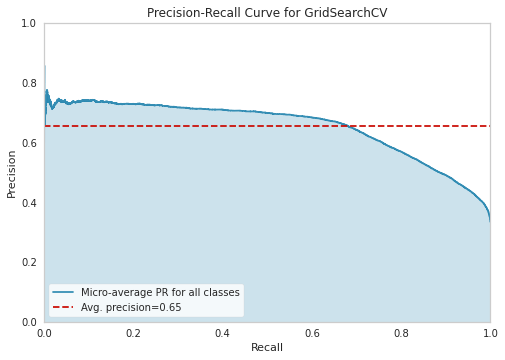

In [91]:
from yellowbrick.classifier import precision_recall_curve, PrecisionRecallCurve

# Create the visualizer, fit, score, and show it
viz = precision_recall_curve(grid_model_log, X_train_scaled, y_train, X_val_scaled, y_val)

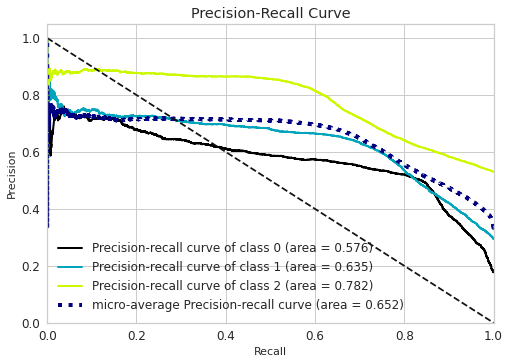

In [94]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_log.predict_proba(X_val_scaled)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

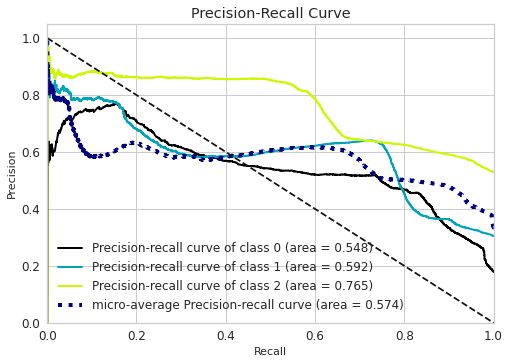

In [95]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_rfc.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

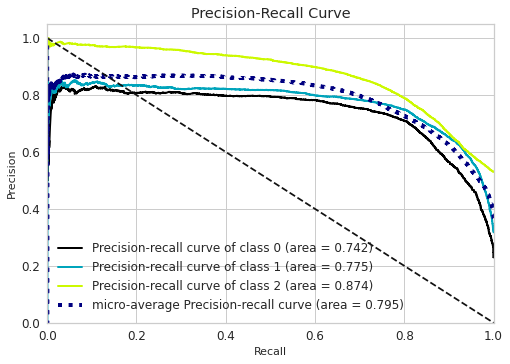

In [96]:
# !pip install scikit-plot -q
import scikitplot as skplt

y_val_proba = grid_model_xgb.predict_proba(X_val_enc)
skplt.metrics.plot_precision_recall(y_val, y_val_proba);
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.plot([0, 1],[1, 0], 'k--')
plt.show()

# 04. Future Importance XGBoost 

In [108]:
# xgb_model has best scorer default parameters
X_val_enc.columns.shape, xgb.feature_importances_.shape

((31,), (31,))

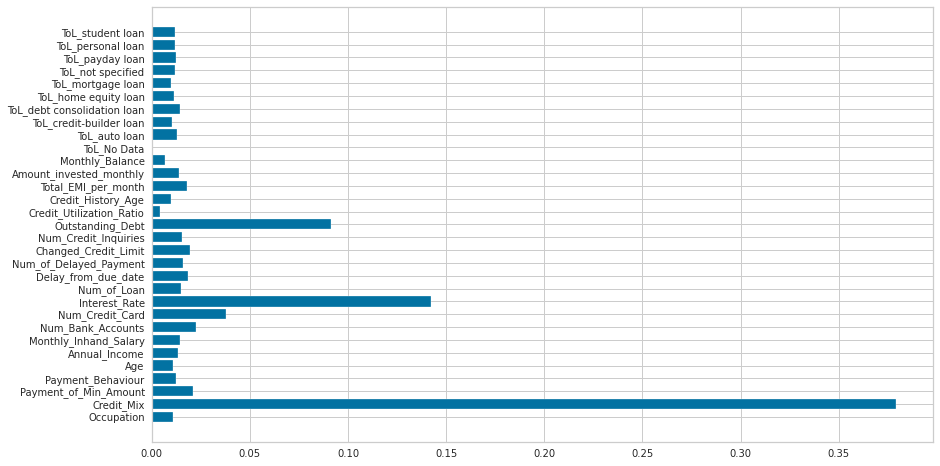

In [109]:
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns, xgb.feature_importances_);

## yellowbrick Feature Importances

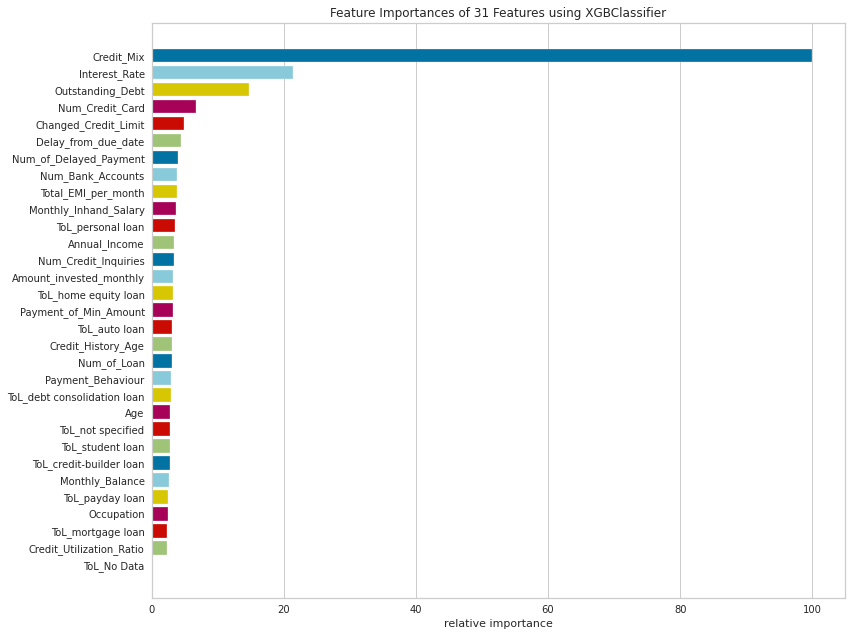

In [110]:
from yellowbrick.model_selection import feature_importances, FeatureImportances

model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)

plt.subplots(figsize=(12, 9))
# Use the quick method and immediately show the figure
feature_importances(model, X_val_enc, y_val);

## Permutation Based Feature Importance (with scikit-learn)

In [134]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb, X_val_enc, y_val)
perm_importance['importances_mean']

array([ 7.9400e-03,  1.6319e-01, -2.2900e-03,  5.2500e-03,  1.0810e-02,
        1.4250e-02,  2.1840e-02,  1.6330e-02,  1.1800e-02,  8.7630e-02,
       -9.1000e-04,  4.6980e-02,  1.6530e-02,  3.4860e-02,  9.2400e-03,
        6.3350e-02,  5.0000e-04,  1.4690e-02,  3.6800e-02,  1.9090e-02,
        7.2100e-03,  0.0000e+00,  1.4100e-03,  1.0700e-03,  6.6000e-04,
        1.1600e-03,  6.1000e-04,  8.0000e-05,  1.1200e-03,  9.8000e-04,
        1.2700e-03])

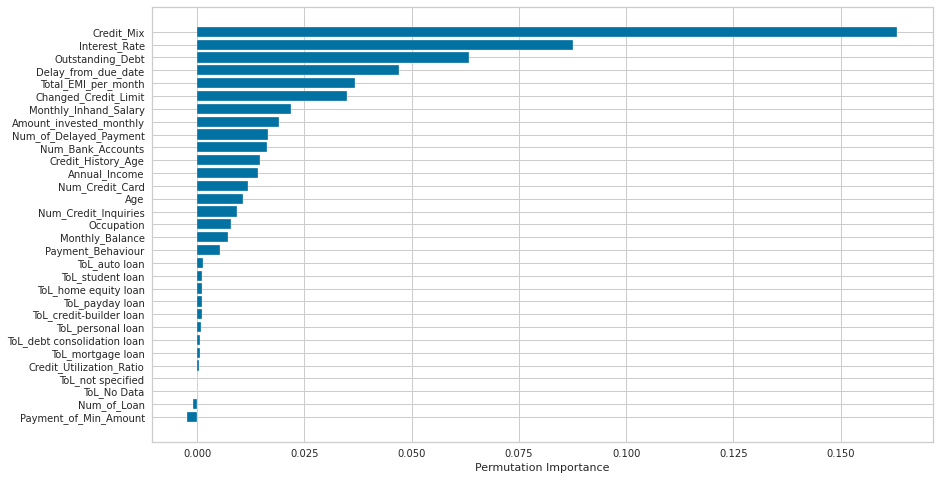

In [135]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(14,8))
plt.barh(X_val_enc.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance");

# 05. Final Model

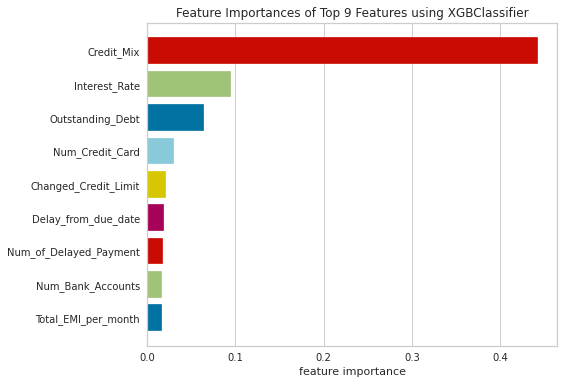

['Total_EMI_per_month' 'Num_Bank_Accounts' 'Num_of_Delayed_Payment'
 'Delay_from_due_date' 'Changed_Credit_Limit' 'Num_Credit_Card'
 'Outstanding_Debt' 'Interest_Rate' 'Credit_Mix']


In [146]:
model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)
# seect top 8 features
viz = feature_importances(model, X_val_enc, y_val, relative=False, topn=9)

# get top 8 features
print(viz.features_)

In [147]:
# we selected 9 features for final model
df_final = df_train[viz.features_.tolist() + ['Credit_Score']]
df_final

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix,Credit_Score
0,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good,Good
1,49.575,3.000,4.000,3.000,11.270,4.000,809.980,3.000,Good,Good
2,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good,Good
3,49.575,3.000,4.000,5.000,6.270,4.000,809.980,3.000,Good,Good
4,49.575,3.000,4.000,6.000,11.270,4.000,809.980,3.000,Good,Good
...,...,...,...,...,...,...,...,...,...,...
99995,35.104,4.000,7.000,23.000,11.500,6.000,502.380,7.000,Good,Poor
99996,35.104,4.000,7.000,18.000,11.500,6.000,502.380,7.000,Good,Poor
99997,35.104,4.000,6.000,27.000,11.500,6.000,502.380,7.000,Good,Poor
99998,35.104,4.000,6.000,20.000,11.500,6.000,502.380,7.000,Good,Standard


In [148]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Total_EMI_per_month     100000 non-null  float64
 1   Num_Bank_Accounts       100000 non-null  float64
 2   Num_of_Delayed_Payment  100000 non-null  float64
 3   Delay_from_due_date     100000 non-null  float64
 4   Changed_Credit_Limit    100000 non-null  float64
 5   Num_Credit_Card         100000 non-null  float64
 6   Outstanding_Debt        100000 non-null  float64
 7   Interest_Rate           100000 non-null  float64
 8   Credit_Mix              100000 non-null  object 
 9   Credit_Score            100000 non-null  object 
dtypes: float64(8), object(2)
memory usage: 7.6+ MB


In [149]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [150]:
cat = X.select_dtypes(include="object").columns.to_list()     
print('OrdinalEncoder:', cat)  
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_enc      = X.copy()
X_enc[cat] = enc.fit_transform(X_enc[cat])

X_enc.shape

OrdinalEncoder: ['Credit_Mix']


(100000, 9)

In [151]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [152]:
sample_weight = class_weight.compute_sample_weight(class_weight='balanced', y=y)
sample_weight

array([1.86971805, 1.86971805, 1.86971805, ..., 1.14950456, 0.62687278,
       1.14950456])

### ({'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100},

In [153]:
final_model = XGBClassifier(
    random_state=random_state, 
    **best_params_xgb
)

In [154]:
%%time
final_model.fit(X_enc, y, 
    sample_weight=sample_weight
)

CPU times: user 43.5 s, sys: 121 ms, total: 43.6 s
Wall time: 11 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

              precision    recall  f1-score   support

           0       0.59      0.88      0.70     17828
           1       0.74      0.84      0.79     28998
           2       0.89      0.68      0.77     53174

    accuracy                           0.76    100000
   macro avg       0.74      0.80      0.75    100000
weighted avg       0.79      0.76      0.76    100000



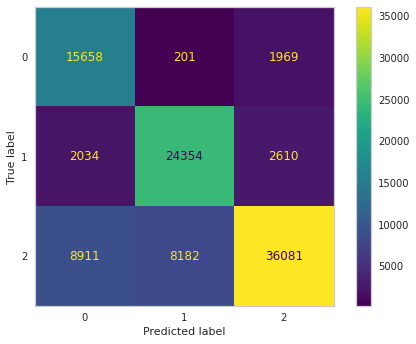

In [155]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_enc)

print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(final_model, X_enc, y);

In [156]:
np.bincount(y_pred)

array([26603, 32737, 40660])

In [168]:
X.head()

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good
1,49.575,3.000,4.000,3.000,11.270,4.000,809.980,3.000,Good
2,49.575,3.000,7.000,3.000,11.270,4.000,809.980,3.000,Good
3,49.575,3.000,4.000,5.000,6.270,4.000,809.980,3.000,Good
4,49.575,3.000,4.000,6.000,11.270,4.000,809.980,3.000,Good


In [170]:
X.describe()

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,107.699,5.369,13.313,21.081,10.470,5.534,1426.220,14.532
std,132.267,2.593,6.237,14.805,6.609,2.067,1155.129,8.741
min,0.000,0.000,0.000,0.000,0.500,0.000,0.230,1.000
25%,29.269,3.000,9.000,10.000,5.380,4.000,566.072,7.000
50%,66.462,5.000,14.000,18.000,9.400,5.000,1166.155,13.000
75%,147.393,7.000,18.000,28.000,14.850,7.000,1945.963,20.000
max,1779.103,11.000,25.000,62.000,29.980,11.000,4998.070,34.000


In [169]:
X.describe(include='O')

,Credit_Mix
count,100000
unique,3
top,Standard
freq,45848


In [165]:
mean_human      = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Total_EMI_per_month,Num_Bank_Accounts,Num_of_Delayed_Payment,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Card,Outstanding_Debt,Interest_Rate,Credit_Mix
0,107,5,13,21,10,5,1426,14,2.000


In [171]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

## Predict Test Data

In [172]:
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])

X_test_enc.shape

(50000, 9)

In [177]:
y_test_pred = final_model.predict(X_test_enc)
pd.value_counts(y_test_pred).sort_index()

0    13739
1    16199
2    20062
dtype: int64

In [178]:
np.bincount(y_test_pred)

array([13739, 16199, 20062])

# 06. Prepare Model Deployment

In [181]:
# Save the model for XGBoost
filename = 'credit_score_multi_class_xgboost_model.bin'
final_model.save_model(filename)

In [182]:
import pickle
pickle.dump(enc, open("credit_score_multi_class_ord_encoder.pkl", 'wb'))
pickle.dump(le,  open("credit_score_multi_class_le.pkl", 'wb'))

## sanity check

In [187]:
# sanity check
# Load the model from the file
loaded_model = XGBClassifier()
loaded_model.load_model(filename)

loaded_enc = pickle.load(open("credit_score_multi_class_ord_encoder.pkl", "rb")) 
loaded_le  = pickle.load(open("credit_score_multi_class_le.pkl", "rb"))

In [188]:
mean_human      = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human[cat] = enc.transform(mean_human[cat])
predict         = loaded_model.predict(mean_human)

predict, loaded_le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

In [189]:
from IPython.display import FileLink, FileLinks
model   = FileLink(filename, result_html_prefix="Click here to download: ")
ord_enc = FileLink(r'credit_score_multi_class_ord_encoder.pkl', result_html_prefix="Click here to download: ")
l_enc   = FileLink(r'credit_score_multi_class_le.pkl', result_html_prefix="Click here to download: ")

display(model, ord_enc, l_enc)

/kaggle/working/credit_score_multi_class_xgboost_model.bin

/kaggle/working/credit_score_multi_class_ord_encoder.pkl

/kaggle/working/credit_score_multi_class_le.pkl

# End of the Project